In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
import os
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
yf.pdr_override()
sp500 = pdr.get_data_yahoo('SPY', start='2015-01-01', end='2022-10-28')
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,208.190002,205.389999,207.990005,205.539993,130333800.0,178.373962
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,178.278534
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,175.058884
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,173.409988
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,175.570831
...,...,...,...,...,...,...
2022-10-24,380.059998,373.109985,375.890015,378.869995,85436900.0,378.869995
2022-10-25,385.250000,378.670013,378.790009,384.920013,78846300.0,384.920013
2022-10-26,387.579987,381.350006,381.619995,382.019989,104087300.0,382.019989


In [3]:
sp500['Volume'] = sp500['Volume']/np.power(10,5)
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,208.190002,205.389999,207.990005,205.539993,1303.338,178.373962
2015-01-02,206.880005,204.179993,206.380005,205.429993,1214.659,178.278534
2015-01-05,204.369995,201.350006,204.169998,201.720001,1696.326,175.058884
2015-01-06,202.720001,198.860001,202.089996,199.820007,2091.514,173.409988
2015-01-07,202.720001,200.880005,201.419998,202.309998,1253.467,175.570831
...,...,...,...,...,...,...
2022-10-24,380.059998,373.109985,375.890015,378.869995,854.369,378.869995
2022-10-25,385.250000,378.670013,378.790009,384.920013,788.463,384.920013
2022-10-26,387.579987,381.350006,381.619995,382.019989,1040.873,382.019989


In [4]:
indicators = ['Close', 'Volume']
symbol_lag_list = []
lag = 14
sp500_lagged = sp500.loc[:, ['Open', 'Close', 'Volume']]
for indicator in indicators:
    for i in range(1, lag):
        sp500_lagged[f'{indicator}_{i}'] = sp500_lagged[indicator].shift(i)
sp500_lagged

,Open,Close,Volume,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,...,Volume_4,Volume_5,Volume_6,Volume_7,Volume_8,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,207.990005,205.539993,1303.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,206.380005,205.429993,1214.659,205.539993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,204.169998,201.720001,1696.326,205.429993,205.539993,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,202.089996,199.820007,2091.514,201.720001,205.429993,205.539993,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,201.419998,202.309998,1253.467,199.820007,201.720001,205.429993,205.539993,NaN,NaN,NaN,...,1303.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,378.869995,854.369,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335,880.657
2022-10-25,378.790009,384.920013,788.463,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,...,797.469,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335
2022-10-26,381.619995,382.019989,1040.873,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,...,882.831,797.469,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895


In [5]:
sp500_test = sp500_lagged.loc[sp500_lagged.index >= '2016-01-01', :]
sp500_test.loc[:, 'return'] = np.log(sp500_test.Close/sp500_test.Close.shift(1))
sp500_test.loc[:, 'cumreturn'] = sp500_test.loc[:, 'return'].cumsum().apply(np.exp)
sp500_test

C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\1857179764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test.loc[:, 'return'] = np.log(sp500_test.Close/sp500_test.Close.shift(1))
C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\1857179764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test.loc[:, 'cumreturn'] = sp500_test.loc[:, 'return'].cumsum().apply(np.exp)


,Open,Close,Volume,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,...,Volume_6,Volume_7,Volume_8,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13,return,cumreturn
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.020004,2223.535,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,...,1109.872,1110.262,990.943,2513.935,1730.925,1970.170,1540.696,1823.852,NaN,NaN
2016-01-05,201.399994,201.360001,1108.458,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,...,485.396,1109.872,1110.262,990.943,2513.935,1730.925,1970.170,1540.696,0.001690,1.001691
2016-01-06,198.339996,198.820007,1521.126,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,...,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925,1970.170,-0.012694,0.989056
2016-01-07,195.330002,194.050003,2134.361,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,...,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925,-0.024284,0.965327
2016-01-08,195.190002,191.919998,2098.172,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,...,633.177,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935,-0.011037,0.954731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,378.869995,854.369,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335,880.657,0.012162,1.884738
2022-10-25,378.790009,384.920013,788.463,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,...,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335,0.015842,1.914834
2022-10-26,381.619995,382.019989,1040.873,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,...,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,-0.007563,1.900408


In [6]:
threshold = 0.02

In [7]:
sp500_test.loc[:, 'Close_Shifted'] = sp500_test['Close'].shift(-6)
sp500_test.loc[:, 'Target'] = ((sp500_test.Close_Shifted-sp500_test.Open)/(sp500_test.Open)).shift(-1)
sp500_test.loc[:, 'Target_Direction'] = np.where(sp500_test.Target > 0, 1, 0)
sp500_test.loc[:, 'Target_Direction'] = np.where(sp500_test.Target < -threshold, -1, sp500_test.Target_Direction)
sp500_test

C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\3558418106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test.loc[:, 'Close_Shifted'] = sp500_test['Close'].shift(-6)
C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\3558418106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test.loc[:, 'Target'] = ((sp500_test.Close_Shifted-sp500_test.Open)/(sp500_test.Open)).shift(-1)
C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\3558418106.py:3: SettingWithCopyWarning: 
A value is trying to be 

,Open,Close,Volume,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,...,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13,return,cumreturn,Close_Shifted,Target,Target_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.020004,2223.535,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,...,2513.935,1730.925,1970.170,1540.696,1823.852,NaN,NaN,193.660004,-0.062413,-1
2016-01-05,201.399994,201.360001,1108.458,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,...,990.943,2513.935,1730.925,1970.170,1540.696,0.001690,1.001691,188.830002,-0.032318,-1
2016-01-06,198.339996,198.820007,1521.126,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,...,1110.262,990.943,2513.935,1730.925,1970.170,-0.012694,0.989056,191.929993,-0.038499,-1
2016-01-07,195.330002,194.050003,2134.361,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,...,1109.872,1110.262,990.943,2513.935,1730.925,-0.024284,0.965327,187.809998,-0.036529,-1
2016-01-08,195.190002,191.919998,2098.172,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,...,485.396,1109.872,1110.262,990.943,2513.935,-0.011037,0.954731,188.059998,-0.038133,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,378.869995,854.369,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,924.828,760.428,1077.895,823.335,880.657,0.012162,1.884738,NaN,NaN,0
2022-10-25,378.790009,384.920013,788.463,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,...,769.918,924.828,760.428,1077.895,823.335,0.015842,1.914834,NaN,NaN,0
2022-10-26,381.619995,382.019989,1040.873,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,...,1472.545,769.918,924.828,760.428,1077.895,-0.007563,1.900408,NaN,NaN,0


In [8]:
lagged_indicators = ['Close', 'Volume']
for indicator in indicators:
    for i in range(1, lag):
        lagged_indicators.append(f'{indicator}_{i}')
lagged_indicators = [lagged_indicators[0]] +lagged_indicators[2:15] +[lagged_indicators[1]] +lagged_indicators[15:]
lagged_indicators

['Close',
 'Close_1',
 'Close_2',
 'Close_3',
 'Close_4',
 'Close_5',
 'Close_6',
 'Close_7',
 'Close_8',
 'Close_9',
 'Close_10',
 'Close_11',
 'Close_12',
 'Close_13',
 'Volume',
 'Volume_1',
 'Volume_2',
 'Volume_3',
 'Volume_4',
 'Volume_5',
 'Volume_6',
 'Volume_7',
 'Volume_8',
 'Volume_9',
 'Volume_10',
 'Volume_11',
 'Volume_12',
 'Volume_13']

In [9]:
test_x,test_y = sp500_test.loc[:, lagged_indicators], sp500_test[['Target_Direction']].to_numpy()
encoder = OneHotEncoder()
test_y = encoder.fit_transform(test_y).todense()
test_x

,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,...,Volume_4,Volume_5,Volume_6,Volume_7,Volume_8,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,201.669998,200.020004,...,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925,1970.170,1540.696,1823.852
2016-01-05,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,201.669998,...,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925,1970.170,1540.696
2016-01-06,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,...,633.177,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925,1970.170
2016-01-07,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,...,1148.779,633.177,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935,1730.925
2016-01-08,191.919998,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,...,2223.535,1148.779,633.177,926.407,658.999,485.396,1109.872,1110.262,990.943,2513.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,356.559998,357.739990,...,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335,880.657
2022-10-25,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,356.559998,...,797.469,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895,823.335
2022-10-26,382.019989,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,882.831,797.469,971.629,931.682,1237.370,1472.545,769.918,924.828,760.428,1077.895


In [10]:
test_x_reshaped = np.array([np.transpose(row.reshape(2,14)) for row in test_x.to_numpy()])
test_x_reshaped.shape, test_y.shape

((1719, 14, 2), (1719, 3))

In [11]:
file_loc = f'{os.getcwd()}\Conv1DFC_validated_model'
model = tf.keras.models.load_model(file_loc)

test_preds_prob = model.predict(test_x_reshaped)
test_preds = np.argmax(test_preds_prob, axis=1)-1
test_preds

54/54 [==============================] - 0s 2ms/step


array([ 1,  0,  1, ...,  1, -1, -1], dtype=int64)

In [12]:
sp500_test.loc[:, 'prediction'] = test_preds
sp500_test

C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\3452108535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test.loc[:, 'prediction'] = test_preds


,Open,Close,Volume,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,...,Volume_10,Volume_11,Volume_12,Volume_13,return,cumreturn,Close_Shifted,Target,Target_Direction,prediction
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.020004,2223.535,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,...,1730.925,1970.170,1540.696,1823.852,NaN,NaN,193.660004,-0.062413,-1,1
2016-01-05,201.399994,201.360001,1108.458,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,...,2513.935,1730.925,1970.170,1540.696,0.001690,1.001691,188.830002,-0.032318,-1,0
2016-01-06,198.339996,198.820007,1521.126,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,...,990.943,2513.935,1730.925,1970.170,-0.012694,0.989056,191.929993,-0.038499,-1,1
2016-01-07,195.330002,194.050003,2134.361,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,...,1110.262,990.943,2513.935,1730.925,-0.024284,0.965327,187.809998,-0.036529,-1,1
2016-01-08,195.190002,191.919998,2098.172,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,...,1109.872,1110.262,990.943,2513.935,-0.011037,0.954731,188.059998,-0.038133,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,378.869995,854.369,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,760.428,1077.895,823.335,880.657,0.012162,1.884738,NaN,NaN,0,0
2022-10-25,378.790009,384.920013,788.463,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,...,924.828,760.428,1077.895,823.335,0.015842,1.914834,NaN,NaN,0,-1
2022-10-26,381.619995,382.019989,1040.873,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,...,769.918,924.828,760.428,1077.895,-0.007563,1.900408,NaN,NaN,0,1


Text(0.5, 1.0, 'Target')

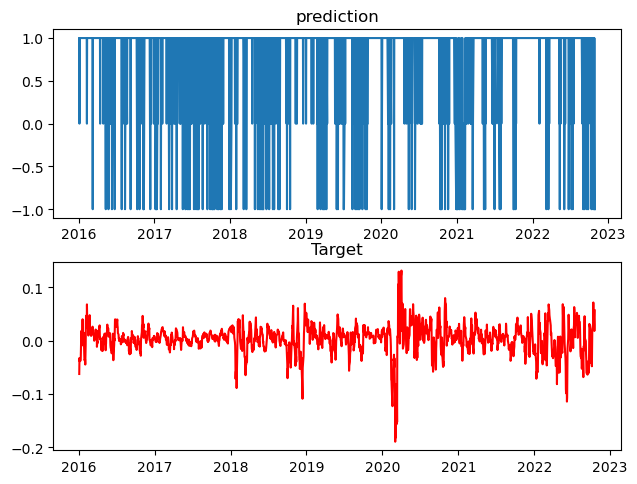

<Figure size 2000x1200 with 0 Axes>

In [13]:
fig, ax = plt.subplots(2, 1)
plt.figure(figsize=(20,12))
fig.tight_layout()
ax[0].plot(pd.to_datetime(sp500_test.index).date, sp500_test['prediction'])
ax[0].set_title('prediction')
ax[1].plot(sp500_test.index, sp500_test['Target'], color='red')
ax[1].set_title('Target')

Text(0.5, 1.0, 'predicted signal')

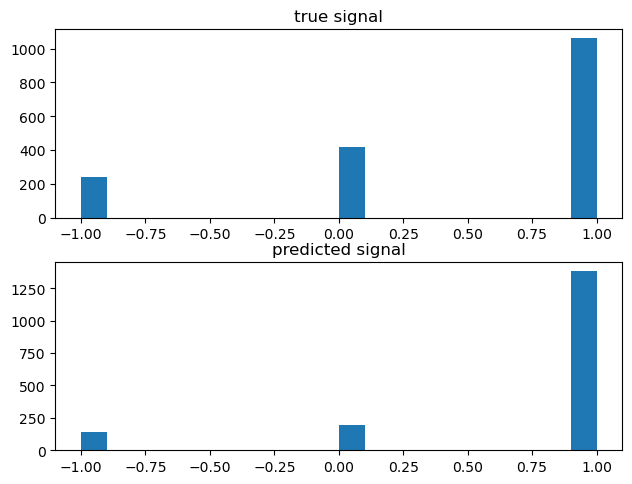

In [14]:
fig, ax = plt.subplots(2,1)
plt.tight_layout()
ax[0].hist(sp500_test.Target_Direction, bins=20)
ax[0].set_title('true signal')
ax[1].hist(sp500_test.prediction, bins=20)
ax[1].set_title('predicted signal')

In [15]:
period = 7
trade = False
counter = 0
position = []
for i in range(len(sp500_test.index)):
    signal = sp500_test.iloc[i]['prediction']
    if trade == True:
        if counter < period:
            counter += 1
            position.append(0)
        else:
            trade = True if signal != 0 else False
            counter = 0
            position.append(signal)
    else:
        trade = True if signal != 0 else False
        position.append(signal)
sp500_test['position'] = position
sp500_test

C:\Users\kmlee\AppData\Local\Temp\ipykernel_30848\1162318339.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_test['position'] = position


,Open,Close,Volume,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,...,Volume_11,Volume_12,Volume_13,return,cumreturn,Close_Shifted,Target,Target_Direction,prediction,position
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,200.490005,201.020004,2223.535,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,203.500000,...,1970.170,1540.696,1823.852,NaN,NaN,193.660004,-0.062413,-1,1,1.0
2016-01-05,201.399994,201.360001,1108.458,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,206.020004,...,1730.925,1970.170,1540.696,0.001690,1.001691,188.830002,-0.032318,-1,0,0.0
2016-01-06,198.339996,198.820007,1521.126,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,205.679993,...,2513.935,1730.925,1970.170,-0.012694,0.989056,191.929993,-0.038499,-1,1,0.0
2016-01-07,195.330002,194.050003,2134.361,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,205.210007,...,990.943,2513.935,1730.925,-0.024284,0.965327,187.809998,-0.036529,-1,1,0.0
2016-01-08,195.190002,191.919998,2098.172,194.050003,198.820007,201.360001,201.020004,203.869995,205.929993,207.399994,...,1110.262,990.943,2513.935,-0.011037,0.954731,188.059998,-0.038133,-1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,378.869995,854.369,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,365.970001,...,1077.895,823.335,880.657,0.012162,1.884738,NaN,NaN,0,0,0.0
2022-10-25,378.790009,384.920013,788.463,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,357.630005,...,760.428,1077.895,823.335,0.015842,1.914834,NaN,NaN,0,-1,0.0
2022-10-26,381.619995,382.019989,1040.873,384.920013,378.869995,374.290009,365.410004,368.500000,371.130005,366.820007,...,924.828,760.428,1077.895,-0.007563,1.900408,NaN,NaN,0,1,0.0


In [19]:
strategies = pd.DataFrame()
strategies['return'] = (sp500_test['Target']*sp500_test['position'] + 1).shift(7)
strategies['strategy'] = np.log(strategies['return'])
strategies['cumstrategy'] = strategies['strategy'].cumsum().apply(np.exp)
strategies

,return,strategy,cumstrategy
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN
...,...,...,...
2022-10-24,1.0,0.0,2.15422
2022-10-25,1.0,0.0,2.15422
2022-10-26,1.0,0.0,2.15422


In [17]:
def plot_returns(benchmark, strategy, title):
    plt.figure(figsize=(20, 12))
    plt.plot(pd.to_datetime(strategy.index).date, strategy.cumstrategy, label='Model')
    plt.plot(benchmark.index, benchmark['cumreturn'], color='red', label='SP500 Buy & Hold')
    plt.title(title)
    plt.gca().grid(True)
    plt.legend()

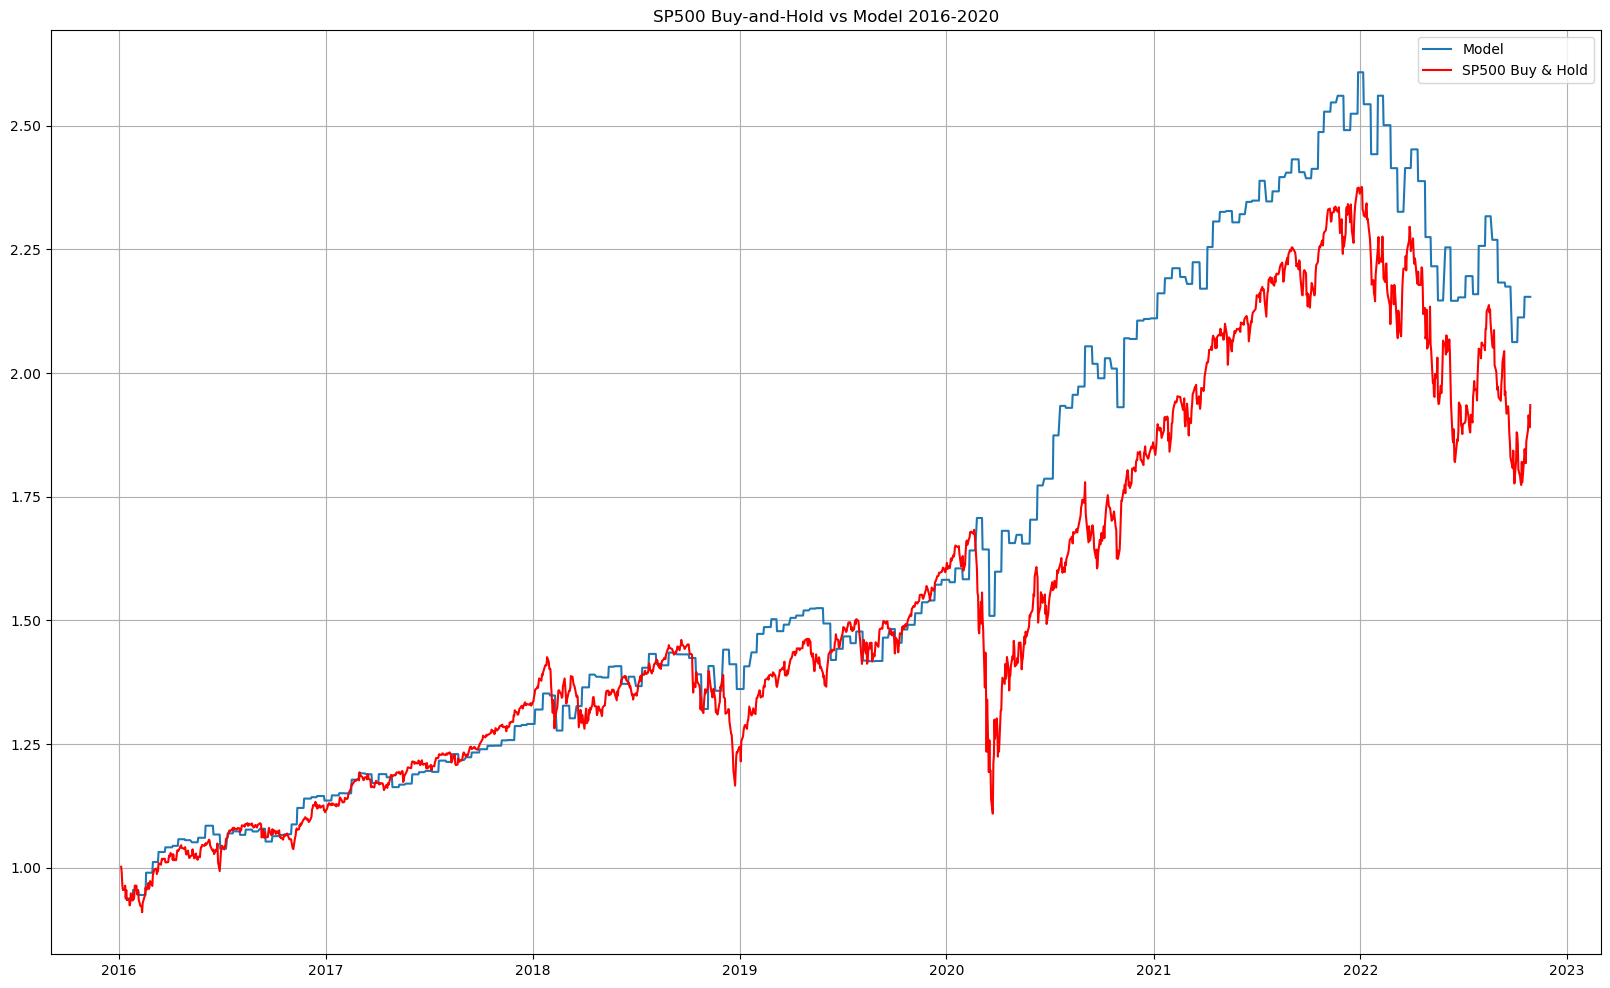

In [20]:
plot_returns(sp500_test, strategies, 'SP500 Buy-and-Hold vs Model 2016-2020')

In [22]:
hits = np.where((sp500_test['Target_Direction'] == sp500_test['prediction']) &
                (sp500_test['position'] != 0) &
                (sp500_test['Target'].isnull() == False), 1, 0)
np.sum(hits)/len(sp500_test[(sp500_test.position != 0) & (sp500_test.Target.isnull()==False)])*100

59.523809523809526

In [25]:
sp500_weekly = sp500_test.copy()
sp500_weekly_return = []
for i in range(len(sp500_weekly)):
    if i%period == 0:
        sp500_weekly_return.append(sp500_weekly.iloc[i]['Target']/100)
    else:
        sp500_weekly_return.append(0)
temp_df = pd.DataFrame({'return': sp500_weekly_return}).shift(7)
temp_df =  temp_df.loc[temp_df['return'] != 0, 'return'].dropna()
sp500_sharpe = temp_df.mean()/temp_df.std()
sp500_sharpe

0.13379370617302538

In [24]:
strategy_weekly_return = strategies.loc[:, ['return']].fillna(1)
strategy_weekly_return = strategy_weekly_return.loc[strategy_weekly_return['return'] != 1, :].values - 1
strategy_sharpe = strategy_weekly_return.mean()/strategy_weekly_return.std()
strategy_sharpe

0.16577985496192088